In [2]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

To simulate an image I used the Point-Spread Function as a Gaussian

In [3]:
psf = al.kernel.from_gaussian(shape_2d=(11,11), sigma = 0.1, pixel_scales = 0.1)

A uniform grid was used.

In [4]:
grid = al.grid.uniform(shape_2d=(100,100), pixel_scales = 0.1, sub_size=2)

In the below section, it is the setup for the source and the lens galaxy. For the source's buldge I used the SpericalDevVaucoulers light profile and for its disk I used the EllipticalExponential light profile. 

For the lens galaxy, I used the SphericalSersic function as the light profile and the SpericalNFW function from the dark_mass_profile section as its mass profile. Also, for the lens_galaxy, the ExternalShear was used. 

In [5]:
source_galaxy = al.Galaxy(
    redshift=1.0,
    bulge=al.lp.SphericalDevVaucouleurs(
        centre=(0.1, 0.2), 
        intensity=0.3, 
        effective_radius=0.3
    ),
    disk=al.lp.EllipticalExponential(
        centre=(0.1, 0.2), 
        axis_ratio=0.8, phi=45.0, 
        intensity=3.0, 
        effective_radius=2.0
    ),
)
lens_galaxy = al.Galaxy(
    redshift=0.5,
    light=al.lp.SphericalSersic(
        centre=(0.0, 0.0), 
        intensity=2.0, 
        effective_radius=0.5, 
        sersic_index=2.5
    ),
    mass=al.mp.dark_mass_profiles.SphericalNFW(),
    shear=al.mp.ExternalShear(
        magnitude=0.05, 
        phi=45.0
        ),
)

The tracer from the ray-tracing module was used to order the galaxies in ascending redshift and to create planes for each redshift with the corresponding galaxies.

The tracer can also be used to perform fully 'ray-traced' images, with no manual setup. 

In [6]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

The lens and source galaxy thus created were plotted in the following blocks:

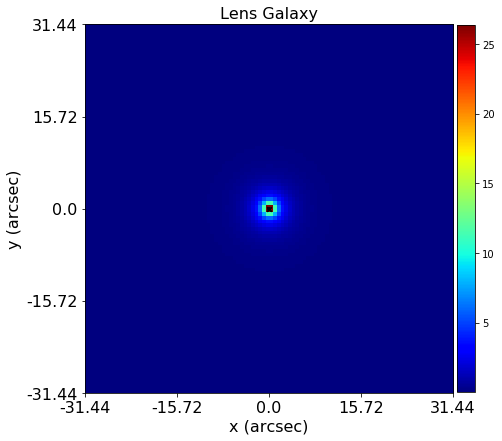

In [7]:
aplt.galaxy.profile_image(
    galaxy=lens_galaxy,
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Lens Galaxy")),
)

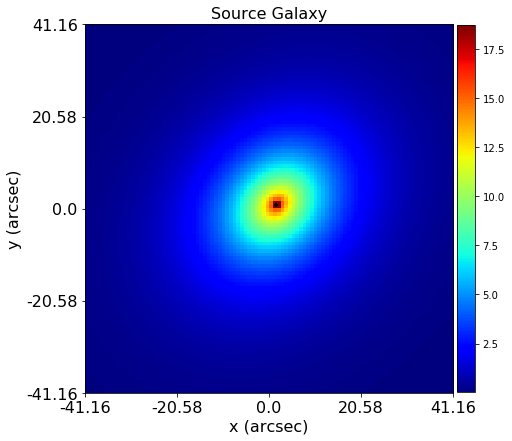

In [8]:
aplt.galaxy.profile_image(
    galaxy=source_galaxy,
    grid=grid,
    plotter=aplt.Plotter(labels=aplt.Labels(title="Source Galaxy")),
)

The next image belongs to the tracer and it's the one that will be simulated. 

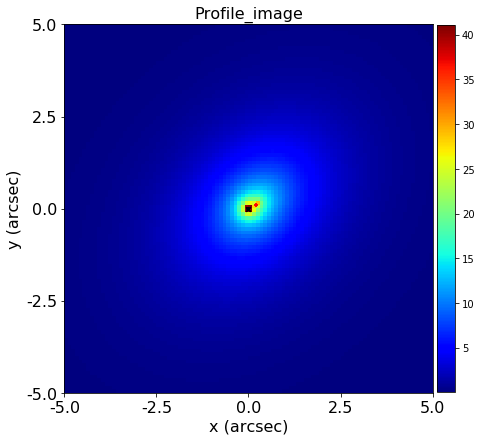

In [9]:
aplt.tracer.profile_image(tracer=tracer, grid=grid)

To ensure edge-effects do not affect the simulation's PSF convolution, an imagine generated from padding the original image will be used. 

In [10]:
normal_image = tracer.profile_image_from_grid(grid=grid)
padded_image = tracer.padded_profile_image_from_grid_and_psf_shape(
    grid=grid,
    psf_shape_2d=psf.shape_2d
)


To simulate an image, the tracer and the grid need to be passed to the simulate function. By doing so, the telescope optics, the background sky and the poison noises are added. 

In [11]:
simulator = al.simulator.imaging(
    shape_2d=grid.shape_2d,
    pixel_scales=0.1,
    sub_size=grid.sub_size,
    exposure_time=300.0,
    psf=psf,
    background_level=0.1,
    add_noise=True,
)
imaging = simulator.from_tracer(tracer=tracer)

The image below represents the final image resulted from the above simulation

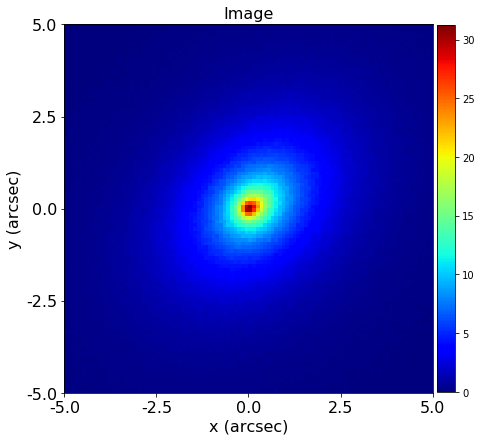

In [12]:
aplt.imaging.image(imaging=imaging)